In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
train_dir=r'C:\Users\hp\Downloads\Final_Assignment_Face Mask Dataset\Train'
valid_dir=r'C:\Users\hp\Downloads\Final_Assignment_Face Mask Dataset\Validation'
test_dir=r'C:\Users\hp\Downloads\Final_Assignment_Face Mask Dataset\Test'

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
rescale=1./255,
height_shift_range=0.2,
width_shift_range=0.2,
rotation_range=40,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
batch_size=20,
class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
valid_dir,
target_size=(128,128),
batch_size=20,
class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG19
conv_base=VGG19(weights='imagenet',
               include_top=False,
               input_shape=(128,128,3))

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])


In [10]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN3-{epoch:02d}.h5")

In [11]:
model_history=model.fit(
train_generator,
steps_per_epoch=50,
epochs=10,
validation_data=validation_generator,
validation_steps=20,
callbacks=[checkpoint_cb])

Epoch 1/10
50/50 [==============================] - 645s 13s/step - loss: 0.2577 - acc: 0.8860 - val_loss: 0.0582 - val_acc: 0.9725
Epoch 2/10
50/50 [==============================] - 634s 13s/step - loss: 0.0908 - acc: 0.9660 - val_loss: 0.0179 - val_acc: 0.9925
Epoch 3/10
50/50 [==============================] - 627s 13s/step - loss: 0.0455 - acc: 0.9850 - val_loss: 0.0138 - val_acc: 0.9950
Epoch 4/10
50/50 [==============================] - 1838s 37s/step - loss: 0.0592 - acc: 0.9850 - val_loss: 0.0052 - val_acc: 0.9975
Epoch 5/10
50/50 [==============================] - 906s 18s/step - loss: 0.0529 - acc: 0.9830 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/10
50/50 [==============================] - 334s 7s/step - loss: 0.0506 - acc: 0.9830 - val_loss: 0.0045 - val_acc: 0.9975
Epoch 7/10
50/50 [==============================] - 5876s 120s/step - loss: 0.0354 - acc: 0.9870 - val_loss: 0.0057 - val_acc: 0.9975
Epoch 8/10
50/50 [==============================] - 302s 6s/step - loss: 0

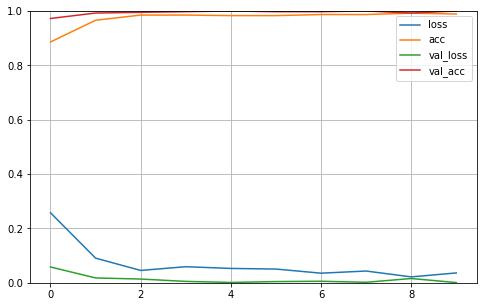

In [12]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [13]:
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=(128,128),
batch_size=20,
class_mode='binary')

Found 992 images belonging to 2 classes.


In [14]:
model.evaluate(test_generator)

50/50 [==============================] - 62s 1s/step - loss: 0.0235 - acc: 0.9929


[0.023461947217583656, 0.992943525314331]

In [15]:
model_history.history

{'loss': [0.2576751112937927,
  0.0907592624425888,
  0.04549086093902588,
  0.05923352763056755,
  0.052857864648103714,
  0.050577033311128616,
  0.03540916368365288,
  0.04329632595181465,
  0.021734323352575302,
  0.03630886226892471],
 'acc': [0.8859999775886536,
  0.9660000205039978,
  0.9850000143051147,
  0.9850000143051147,
  0.9829999804496765,
  0.9829999804496765,
  0.9869999885559082,
  0.9869999885559082,
  0.9919999837875366,
  0.9890000224113464],
 'val_loss': [0.05819088965654373,
  0.017861049622297287,
  0.013813218101859093,
  0.005172243341803551,
  0.0012367605231702328,
  0.004499101545661688,
  0.0056893485598266125,
  0.0018989518284797668,
  0.015750227496027946,
  0.000838745036162436],
 'val_acc': [0.9725000262260437,
  0.9925000071525574,
  0.9950000047683716,
  0.9975000023841858,
  1.0,
  0.9975000023841858,
  0.9975000023841858,
  1.0,
  0.9925000071525574,
  1.0]}